In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds1="datasets/insurance.csv"

In [3]:
ins_ds=pd.read_csv(ds1)

In [4]:
ins_ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


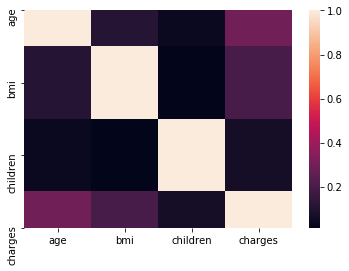

In [5]:
sns.heatmap(data=ins_ds.corr())

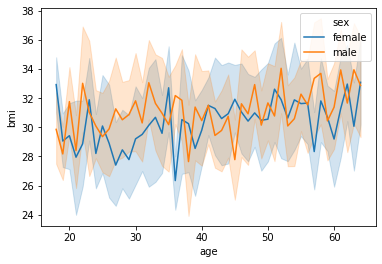

In [6]:
sns.lineplot(y=ins_ds['bmi'],x=ins_ds["age"],hue=ins_ds["sex"])

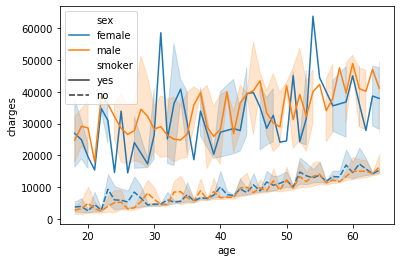

In [7]:
sns.lineplot(y=ins_ds['charges'],x=ins_ds["age"],hue=ins_ds["sex"],style=ins_ds['smoker'])

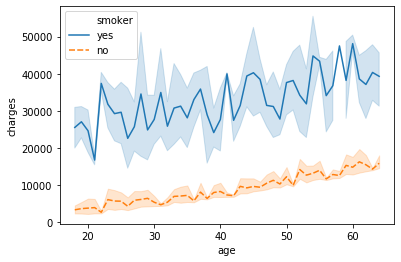

In [8]:
sns.lineplot(y=ins_ds['charges'],x=ins_ds["age"],hue=ins_ds["smoker"],style=ins_ds['smoker'])

In [26]:
ins_ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [136]:
ins_ml=ins_ds.drop(['region','children'],axis=1)

In [137]:
ins_ml

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


In [138]:
ins_ml.replace("yes",1,inplace=True)
ins_ml.replace("no",0,inplace=True)
ins_ml.replace("male",1,inplace=True)
ins_ml.replace("female",0,inplace=True)

In [139]:
ins_ml.head(20)

,age,sex,bmi,smoker,charges
0,19,0,27.900,1,16884.92400
1,18,1,33.770,0,1725.55230
2,28,1,33.000,0,4449.46200
3,33,1,22.705,0,21984.47061
4,32,1,28.880,0,3866.85520
5,31,0,25.740,0,3756.62160
6,46,0,33.440,0,8240.58960
7,37,0,27.740,0,7281.50560
8,37,1,29.830,0,6406.41070
9,60,0,25.840,0,28923.13692


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)

In [141]:
X=ins_ml[['age','sex','bmi','smoker']]
X=poly.fit_transform(X)
y=ins_ml[['charges']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
X[:2]

array([[1.00000000e+00, 1.90000000e+01, 0.00000000e+00, 2.79000000e+01,
        1.00000000e+00, 3.61000000e+02, 0.00000000e+00, 5.30100000e+02,
        1.90000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.78410000e+02, 2.79000000e+01, 1.00000000e+00, 6.85900000e+03,
        0.00000000e+00, 1.00719000e+04, 3.61000000e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.47897900e+04, 5.30100000e+02,
        1.90000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.17176390e+04,
        7.78410000e+02, 2.79000000e+01, 1.00000000e+00],
       [1.00000000e+00, 1.80000000e+01, 1.00000000e+00, 3.37700000e+01,
        0.00000000e+00, 3.24000000e+02, 1.80000000e+01, 6.07860000e+02,
        0.00000000e+00, 1.00000000e+00, 3.37700000e+01, 0.00000000e+00,
        1.14041290e+03, 0.00000000e+00, 0.00000000e+00, 5.83200000e+03,
        3.24000000e+02, 1.09414800e+04, 0.00000000e+00, 1.80000000e+01,
       

In [155]:
regr=LinearRegression(n_jobs=-1)
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [156]:

regr.score(X_test,y_test)

0.8105813749889899

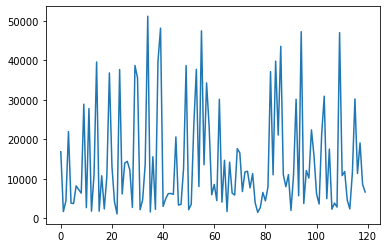

In [157]:
Y=regr.predict(X)
sns.lineplot(data=ins_ml['charges'][0:120])


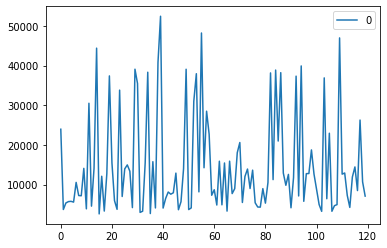

In [158]:
sns.lineplot(data=Y[0:120])

In [159]:
PredVR=pd.DataFrame()

In [160]:
PredVR=PredVR.append(y)
_Y = pd.DataFrame(Y)
PredVR=PredVR.append(_Y)

In [161]:
_Y.head()

,0
0,23950.387048
1,3718.564578
2,5370.143654
3,5712.552443
4,5776.908593


In [162]:
PredVR['diff']=PredVR['charges']

In [163]:
a=PredVR['diff'].sub(PredVR[0],fill_value=0)

In [164]:
a.head(40)

0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
6      8240.58960
7      7281.50560
8      6406.41070
9     28923.13692
10     2721.32080
11    27808.72510
12     1826.84300
13    11090.71780
14    39611.75770
15     1837.23700
16    10797.33620
17     2395.17155
18    10602.38500
19    36837.46700
20    13228.84695
21     4149.73600
22     1137.01100
23    37701.87680
24     6203.90175
25    14001.13380
26    14451.83515
27    12268.63225
28     2775.19215
29    38711.00000
30    35585.57600
31     2198.18985
32     4687.79700
33    13770.09790
34    51194.55914
35     1625.43375
36    15612.19335
37     2302.30000
38    39774.27630
39    48173.36100
dtype: float64

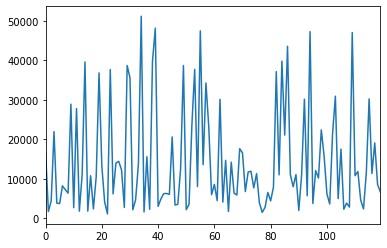

In [165]:
a[0:120].plot()
